In [1]:
import json
import jsonlines
from tqdm.auto import tqdm
from collections import defaultdict
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np

from cooccurrence_matrix import CooccurrenceMatrix

/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pile_coo_matrix = CooccurrenceMatrix('pile')
bert_coo_matrix = CooccurrenceMatrix('bert_pretraining_data')

In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stopword_list = stopwords.words("english")

filter = {}
for w in stopword_list:
    filter[w] = w
punctuations = {
    "?": "?",
    ":": ":",
    "!": "!",
    ".": ".",
    ",": ",",
    ";": ";"
}
filter.update(punctuations)
def filtering(text):
    if text in filter:
        return True

def text_normalization_without_lemmatization(text):
    result = []
    tokens = word_tokenize(text)
    
    for token in tokens:
        token_low = token.lower()
        if filtering(token_low):
            continue
        result.append(token_low)
    return result

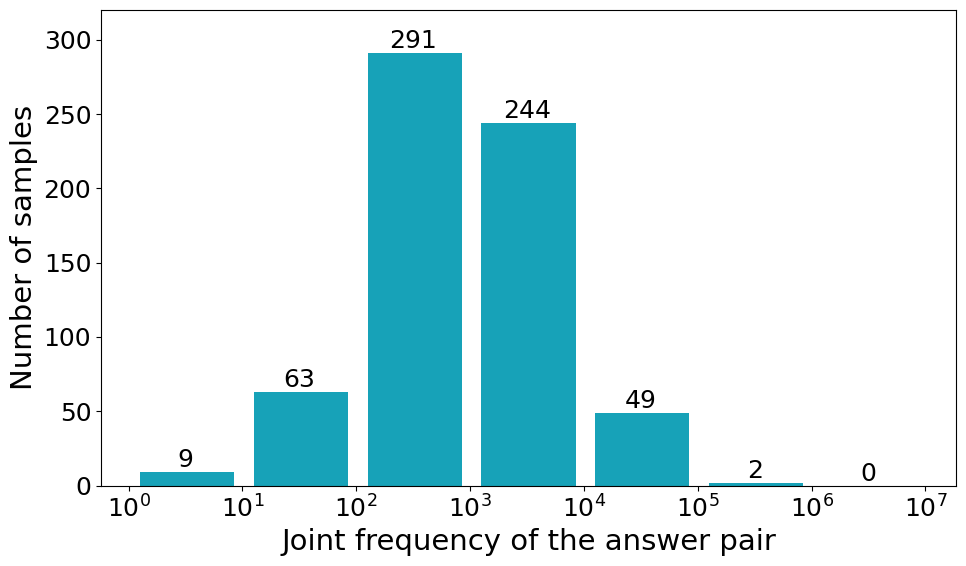

In [4]:
import matplotlib.pyplot as plt
import matplotlib

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

######################################################################

dataset = 'bert'
# dataset = 'pile'

bin_edges = np.logspace(0, 7, 8)  # Create bin edges for log scale
# bert_counts = [439, 764, 975, 651, 131, 4, 0]
# pile_counts = [0, 9, 48, 474, 998, 984, 451]

bert_counts = [9, 63, 291, 244, 49, 2, 0]
pile_counts = [0, 0, 0, 4, 87, 337, 230]


counts = {
    'bert': bert_counts,
    'pile': pile_counts
}

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
# The 'align=edge' and the bin_edges[:-1] aligns bars starting from the left edge
bars = ax.bar(np.power(10, np.arange(len(bin_edges[:-1]))+0.1), counts[dataset], width=np.diff(bin_edges)*0.8, align='edge', color='#17a2b8')

# Set x-axis to logarithmic scales
ax.set_xscale('log')
plt.xticks(bin_edges, labels=[f'$10^{i}$' for i in range(len(bin_edges))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting labels (adjust as needed)
ax.set_xlabel('Joint frequency of the answer pair')
ax.set_ylabel('Number of samples')

# Annotate each bar with the count
for bar, x_pos in zip(bars, np.power(10, np.arange(len(bin_edges[:-1]))+0.5)):
    yval = bar.get_height()
    ax.text(x_pos, yval, f'{yval:,}', va='bottom', ha='center', wrap=True)

# Set the labels and title
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(0, np.max(counts[dataset])*1.1)

# Show the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(f'results/number_of_samples_analogy_{dataset}.pdf', bbox_inches='tight', format='pdf')
plt.show()


In [5]:
gt_filtered = json.load(open('../data/analogy_filtered/MC_test.json', 'r'))
gt_filtered_uids = [sample['uid'] for sample in gt_filtered]

In [6]:
bins = [0, 10, 100, 1000, 10000, 100000, 1000000]
# bins = [0, 10, 100, 1000, 10000, 100000]
# bins = [0, 10, 100, 1000]

def frequency_to_section(value):
    return np.digitize(value, bins)

def frequency_section_to_string(section):
    return f'{section}'

Model: bert-base-uncased


100%|██████████| 3296/3296 [00:00<00:00, 9528.21it/s] 
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
[0.2222222222222222, 0.3492063492063492, 0.6254295532646048, 0.7049180327868853, 0.8163265306122449, 1.0, nan]
Model: bert-large-uncased


100%|██████████| 3296/3296 [00:00<00:00, 9065.23it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
[0.2222222222222222, 0.4603174603174603, 0.6460481099656358, 0.7377049180327869, 0.8571428571428571, 1.0, nan]
Model: gpt-j-6b


100%|██████████| 3296/3296 [00:00<00:00, 9584.12it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
[nan, nan, nan, 0.25, 0.5057471264367817, 0.6735905044510386, 0.8347826086956521]
Model: Meta-Llama-3-8B


100%|██████████| 3296/3296 [00:00<00:00, 9746.56it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
[nan, nan, nan, 0.5, 0.5747126436781609, 0.7359050445103857, 0.8913043478260869]


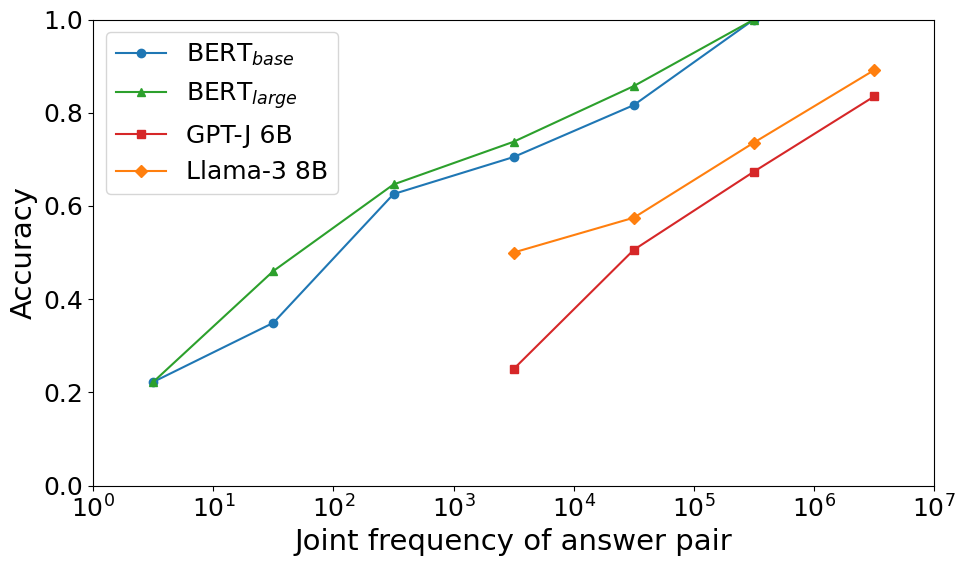

In [14]:
model_name_dict = {
    'bert-base-uncased': 'BERT$_{base}$',
    'bert-large-uncased': 'BERT$_{large}$',
    'gpt-j-6b': 'GPT-J 6B',
    'Meta-Llama-3-8B': 'Llama-3 8B',
}

colors = {
    'bert-base-uncased': 'tab:blue',
    'bert-large-uncased': 'tab:green',
    'gpt-j-6b': 'tab:red',
    'Meta-Llama-3-8B': 'tab:orange',
}
markers = {
    'bert-base-uncased': 'o',
    'bert-large-uncased': '^',
    'gpt-j-6b': 's',
    'Meta-Llama-3-8B': 'D',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
    results_ppl, results_tail_ppl = defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            
            # try:
            #     freq = 1 / (freq/subj_count)
            # except:
            #     freq = 0

            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        results_ppl[section].append(pred['ppl'])
        results_tail_rank[section].append(1 + pred['tail_rank'])
        results_tail_acc[section].append(pred['tail_accuracy'])
        results_tail_ppl[section].append(pred['tail_ppl'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_ppl[section] = np.mean(results_ppl[section]), np.std(results_ppl[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])
            results_tail_ppl[section] = np.mean(results_tail_ppl[section]), np.std(results_tail_ppl[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_ppl:
            result[f'result_ppl_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_ppl[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
    for section in sections:
        if section in results_tail_ppl:
            result[f'result_tail_ppl_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_ppl[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    print(hits_100_mean)
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

In [9]:
bins = [0, 10, 100, 1000, 10000, 100000, 1000000]
# bins = [0, 10, 100, 1000, 10000, 100000]
# bins = [0, 10, 100, 1000]

def frequency_to_section(value):
    return np.digitize(value, bins)

def frequency_section_to_string(section):
    return f'{section}'

Model: gpt-3.5-turbo-0125


100%|██████████| 3296/3296 [00:00<00:00, 9119.30it/s] 
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
[nan, nan, nan, 0.5, 0.6436781609195402, 0.629080118694362, 0.691304347826087]
Model: gpt-4o-2024-08-06


100%|██████████| 3296/3296 [00:00<00:00, 9090.16it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
[nan, nan, nan, 1.0, 0.7816091954022989, 0.9080118694362018, 0.9391304347826087]


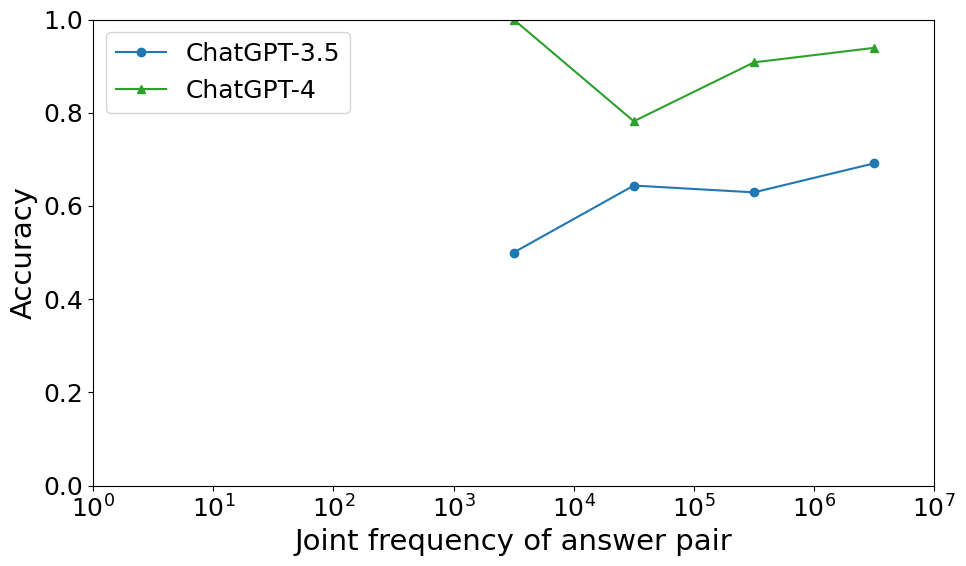

In [12]:
model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'bert-large-uncased': 'BERT$_{large}$',
    # 'albert-base-v1': 'ALBERT1$_{base}$',
    # 'albert-large-v1': 'ALBERT1$_{large}$',
    # 'albert-xlarge-v1': 'ALBERT1$_{xlarge}$',
    # 'albert-base-v2': 'ALBERT2$_{base}$',
    # 'albert-large-v2': 'ALBERT2$_{large}$',
    # 'albert-xlarge-v2': 'ALBERT2$_{xlarge}$',
    # 'roberta-base': 'RoBERTa$_{base}$',
    # 'roberta-large': 'RoBERTa$_{large}$',
    # 'gpt-neo-125m': 'GPT-Neo 125M',
    # 'gpt-neo-1.3B': 'GPT-Neo 1.3B',
    # 'gpt-neo-2.7B': 'GPT-Neo 2.7B',
    # 'gpt-j-6b': 'GPT-J 6B',
    'gpt-3.5-turbo-0125': 'ChatGPT-3.5',
    'gpt-4o-2024-08-06': 'ChatGPT-4o'
}

colors = {
    'gpt-3.5-turbo-0125': 'tab:blue',
    'gpt-4o-2024-08-06': 'tab:green',
}
markers = {
    'gpt-3.5-turbo-0125': 'o',
    'gpt-4o-2024-08-06': '^',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        # results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        # results_tail_rank[section].append(1 + pred['tail_rank'])
        # results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_acc[section])

        if section in results_acc:
            # results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            # results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            # results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    # for section in sections:
    #     if section in results_rank:
    #         result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    # for section in sections:
    #     if section in results_tail_rank:
    #         result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    # for section in sections:
    #     if section in results_tail_acc:
    #         result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    print(hits_100_mean)
    hits_100_std = [results_acc[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_chatgpt_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

Model: gpt-neo-125m


  0%|          | 0/3296 [00:00<?, ?it/s]

100%|██████████| 3296/3296 [00:00<00:00, 10032.72it/s]
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
Model: gpt-neo-1.3B


100%|██████████| 3296/3296 [00:00<00:00, 9913.49it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
Model: gpt-neo-2.7B


100%|██████████| 3296/3296 [00:00<00:00, 9719.25it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}
Model: Meta-Llama-3-8B-Instruct


100%|██████████| 3296/3296 [00:00<00:00, 9756.00it/s] 


{1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 337, 7: 230}


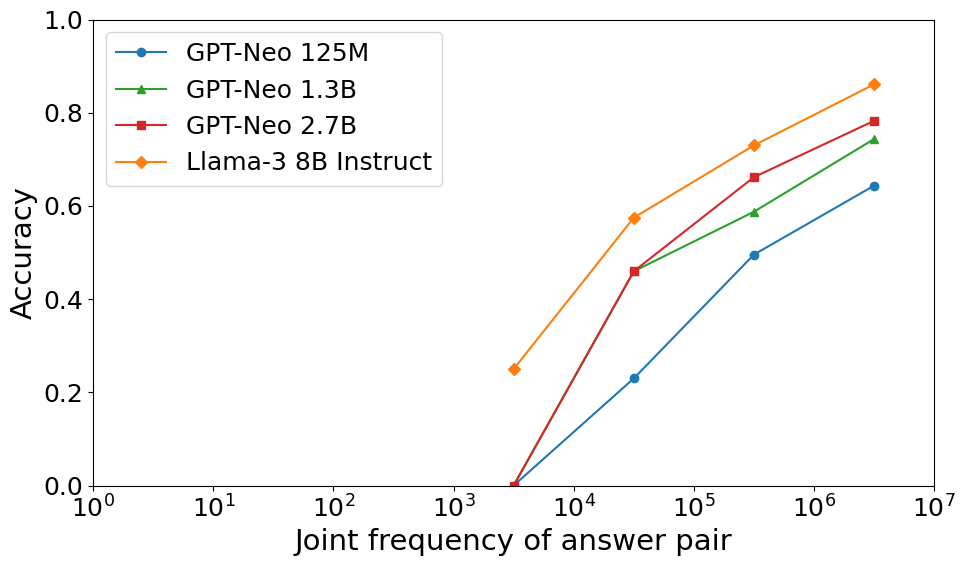

In [12]:
model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'bert-large-uncased': 'BERT$_{large}$',
    # 'albert-base-v1': 'ALBERT1$_{base}$',
    # 'albert-large-v1': 'ALBERT1$_{large}$',
    # 'albert-xlarge-v1': 'ALBERT1$_{xlarge}$',
    # 'albert-base-v2': 'ALBERT2$_{base}$',
    # 'albert-large-v2': 'ALBERT2$_{large}$',
    # 'albert-xlarge-v2': 'ALBERT2$_{xlarge}$',
    # 'roberta-base': 'RoBERTa$_{base}$',
    # 'roberta-large': 'RoBERTa$_{large}$',
    'gpt-neo-125m': 'GPT-Neo 125M',
    'gpt-neo-1.3B': 'GPT-Neo 1.3B',
    'gpt-neo-2.7B': 'GPT-Neo 2.7B',
    'Meta-Llama-3-8B-Instruct': 'Llama-3 8B Instruct',
    # 'gpt-j-6b': 'GPT-J 6B',
    # 'gpt-3.5-turbo-0125': 'ChatGPT-3.5',
    # 'gpt-4-0125-preview': 'ChatGPT-4'
}

colors = {
    'gpt-neo-125m': 'tab:blue',
    'gpt-neo-1.3B': 'tab:green',
    'gpt-neo-2.7B': 'tab:red',
    # 'gpt-j-6b': 'tab:orange',
    'Meta-Llama-3-8B-Instruct': 'tab:orange',
}
markers = {
    'gpt-neo-125m': 'o',
    'gpt-neo-1.3B': '^',
    'gpt-neo-2.7B': 's',
    # 'gpt-j-6b': 'D',
    'Meta-Llama-3-8B-Instruct': 'D',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue
        
        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        results_tail_rank[section].append(1 + pred['tail_rank'])
        results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_glms_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

Model: roberta-base


  0%|          | 0/3296 [00:00<?, ?it/s]

100%|██████████| 3296/3296 [00:00<00:00, 9698.68it/s] 
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
Model: roberta-large


100%|██████████| 3296/3296 [00:00<00:00, 9861.28it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}


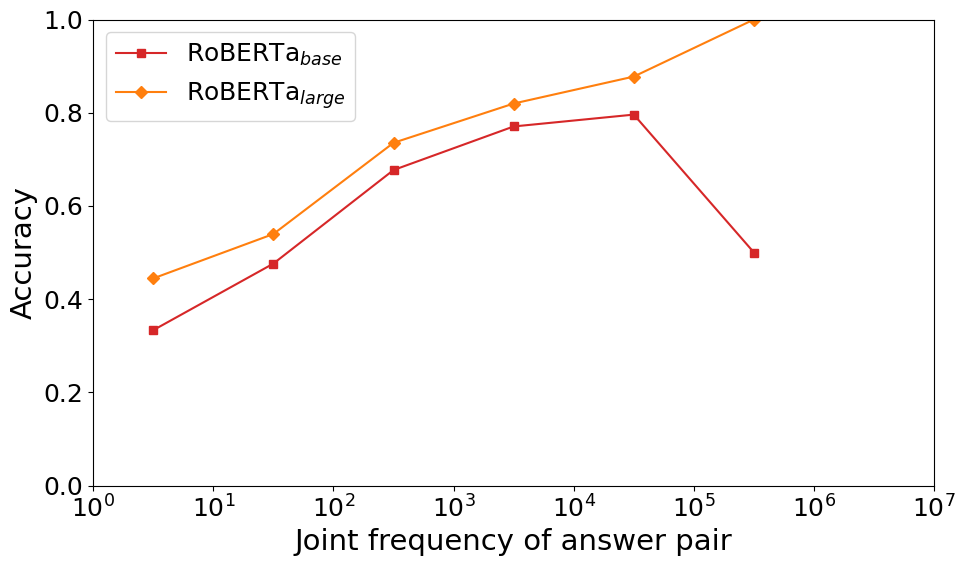

In [10]:
model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'bert-large-uncased': 'BERT$_{large}$',
    # 'albert-base-v1': 'ALBERT1$_{base}$',
    # 'albert-large-v1': 'ALBERT1$_{large}$',
    # 'albert-xlarge-v1': 'ALBERT1$_{xlarge}$',
    # 'albert-base-v2': 'ALBERT2$_{base}$',
    # 'albert-large-v2': 'ALBERT2$_{large}$',
    # 'albert-xlarge-v2': 'ALBERT2$_{xlarge}$',
    'roberta-base': 'RoBERTa$_{base}$',
    'roberta-large': 'RoBERTa$_{large}$',
    # 'gpt-neo-125m': 'GPT-Neo 125M',
    # 'gpt-neo-1.3B': 'GPT-Neo 1.3B',
    # 'gpt-neo-2.7B': 'GPT-Neo 2.7B',
    # 'gpt-j-6b': 'GPT-J 6B',
    # 'gpt-3.5-turbo-0125': 'ChatGPT-3.5',
    # 'gpt-4-0125-preview': 'ChatGPT-4'
}

colors = {
    'bert-base-uncased': 'tab:blue',
    'bert-large-uncased': 'tab:green',
    'roberta-base': 'tab:red',
    'roberta-large': 'tab:orange',
}
markers = {
    'bert-base-uncased': 'o',
    'bert-large-uncased': '^',
    'roberta-base': 's',
    'roberta-large': 'D',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        results_tail_rank[section].append(1 + pred['tail_rank'])
        results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_roberta_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

Model: albert-base-v1


100%|██████████| 3296/3296 [00:00<00:00, 8970.46it/s] 
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
Model: albert-large-v1


100%|██████████| 3296/3296 [00:00<00:00, 9215.88it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
Model: albert-xlarge-v1


100%|██████████| 3296/3296 [00:00<00:00, 9328.86it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}


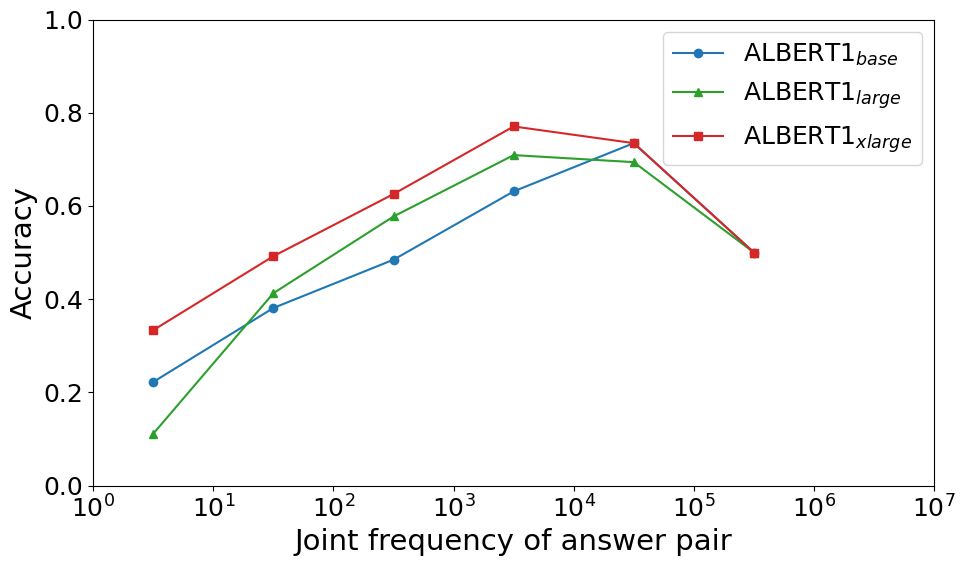

In [15]:
model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'bert-large-uncased': 'BERT$_{large}$',
    'albert-base-v1': 'ALBERT1$_{base}$',
    'albert-large-v1': 'ALBERT1$_{large}$',
    'albert-xlarge-v1': 'ALBERT1$_{xlarge}$',
    # 'albert-base-v2': 'ALBERT2$_{base}$',
    # 'albert-large-v2': 'ALBERT2$_{large}$',
    # 'albert-xlarge-v2': 'ALBERT2$_{xlarge}$',
    # 'roberta-base': 'RoBERTa$_{base}$',
    # 'roberta-large': 'RoBERTa$_{large}$',
    # 'gpt-neo-125m': 'GPT-Neo 125M',
    # 'gpt-neo-1.3B': 'GPT-Neo 1.3B',
    # 'gpt-neo-2.7B': 'GPT-Neo 2.7B',
    # 'gpt-j-6b': 'GPT-J 6B',
    # 'gpt-3.5-turbo-0125': 'ChatGPT-3.5',
    # 'gpt-4-0125-preview': 'ChatGPT-4'
}

colors = {
    'albert-base-v1': 'tab:blue',
    'albert-large-v1': 'tab:green',
    'albert-xlarge-v1': 'tab:red',
}
markers = {
    'albert-base-v1': 'o',
    'albert-large-v1': '^',
    'albert-xlarge-v1': 's',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue
        
        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        results_tail_rank[section].append(1 + pred['tail_rank'])
        results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_albert1_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

Model: albert-base-v2


100%|██████████| 3296/3296 [00:00<00:00, 8843.74it/s] 
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data2/cwkang/anaconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_me

{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
Model: albert-large-v2


100%|██████████| 3296/3296 [00:00<00:00, 8393.65it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}
Model: albert-xlarge-v2


100%|██████████| 3296/3296 [00:00<00:00, 8835.69it/s] 


{1: 9, 2: 63, 3: 291, 4: 244, 5: 49, 6: 2, 7: 0}


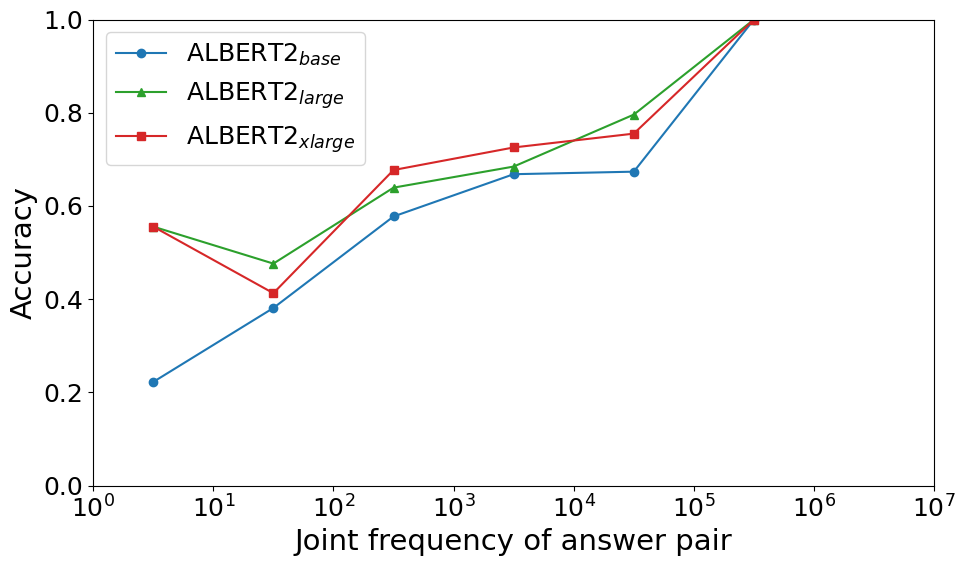

In [16]:
model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'bert-large-uncased': 'BERT$_{large}$',
    # 'albert-base-v1': 'ALBERT1$_{base}$',
    # 'albert-large-v1': 'ALBERT1$_{large}$',
    # 'albert-xlarge-v1': 'ALBERT1$_{xlarge}$',
    'albert-base-v2': 'ALBERT2$_{base}$',
    'albert-large-v2': 'ALBERT2$_{large}$',
    'albert-xlarge-v2': 'ALBERT2$_{xlarge}$',
    # 'roberta-base': 'RoBERTa$_{base}$',
    # 'roberta-large': 'RoBERTa$_{large}$',
    # 'gpt-neo-125m': 'GPT-Neo 125M',
    # 'gpt-neo-1.3B': 'GPT-Neo 1.3B',
    # 'gpt-neo-2.7B': 'GPT-Neo 2.7B',
    # 'gpt-j-6b': 'GPT-J 6B',
    # 'gpt-3.5-turbo-0125': 'ChatGPT-3.5',
    # 'gpt-4-0125-preview': 'ChatGPT-4'
}

colors = {
    'albert-base-v2': 'tab:blue',
    'albert-large-v2': 'tab:green',
    'albert-xlarge-v2': 'tab:red',
}
markers = {
    'albert-base-v2': 'o',
    'albert-large-v2': '^',
    'albert-xlarge-v2': 's',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
# x_tick_labels = [1, 10, 100, 1000, 10000]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])

        section = frequency_to_section(ans_freq)

        results_rank[section].append(1 + pred['rank'])
        results_acc[section].append(pred['accuracy'])
        results_tail_rank[section].append(1 + pred['tail_rank'])
        results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'$10^{i}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
plt.xlabel('Joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# ax1.set_ylabel('Rank', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_albert2_zeroshot_accuracy_against_jointprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

In [54]:
bins = [0, 10, 100, 1000, 10000, 100000, 1000000]
# bins = [0, 10, 100, 1000, 10000, 100000]
# bins = [0, 10, 100, 1000]

Model: bert-base-uncased


100%|██████████| 3296/3296 [00:00<00:00, 9319.16it/s] 


{1: 223, 2: 213, 3: 132, 4: 83, 5: 7}
Model: bert-large-uncased


100%|██████████| 3296/3296 [00:00<00:00, 9200.80it/s] 


{1: 223, 2: 213, 3: 132, 4: 83, 5: 7}
Model: gpt-j-6b


100%|██████████| 3296/3296 [00:00<00:00, 8745.27it/s] 


{1: 186, 2: 167, 3: 150, 4: 148, 5: 7}
Model: Meta-Llama-3-8B


100%|██████████| 3296/3296 [00:00<00:00, 8641.12it/s] 


{1: 186, 2: 167, 3: 150, 4: 148, 5: 7}


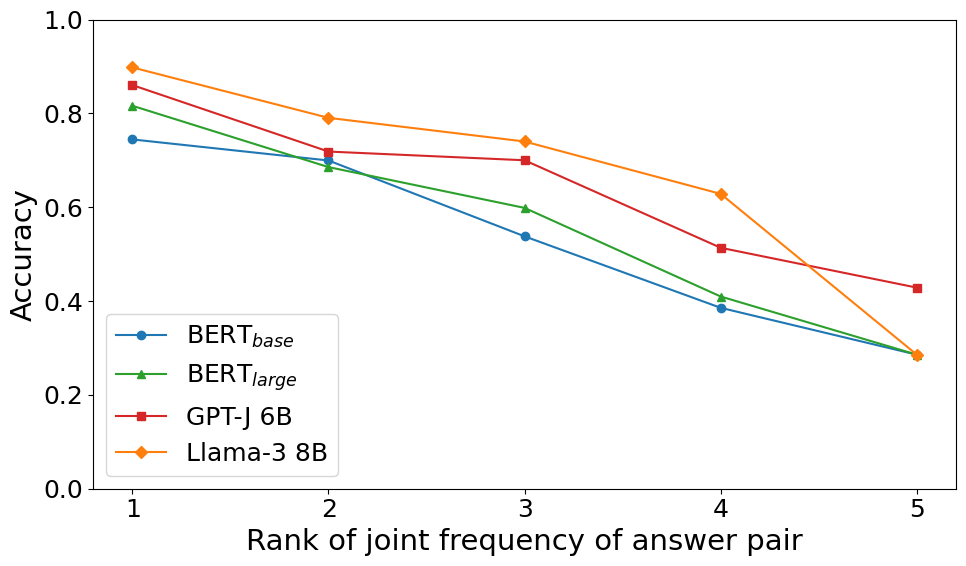

In [17]:
model_name_dict = {
    'bert-base-uncased': 'BERT$_{base}$',
    'bert-large-uncased': 'BERT$_{large}$',
    'gpt-j-6b': 'GPT-J 6B',
    'Meta-Llama-3-8B': 'Llama-3 8B',
}

colors = {
    'bert-base-uncased': 'tab:blue',
    'bert-large-uncased': 'tab:green',
    'gpt-j-6b': 'tab:red',
    'Meta-Llama-3-8B': 'tab:orange',
}
markers = {
    'bert-base-uncased': 'o',
    'bert-large-uncased': '^',
    'gpt-j-6b': 's',
    'Meta-Llama-3-8B': 'D',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

# Fixed x-axis values - the positions where the x-tick labels will be placed
x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# x_tick_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
x_tick_labels = [1, 2, 3, 4, 5]
# Calculate midpoints for plotting the data points
x_values = np.sqrt(np.array(x_tick_labels[:-1]) * np.array(x_tick_labels[1:]))
x_values = x_tick_labels

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        freqs = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            freq = subj_obj_count
            freqs.append(freq)
        
        if not flag:
            continue

        ans_freq = freqs[pred['answer']]
        freq_order = np.argsort(freqs).tolist()
        freq_rank = freq_order.index(pred['answer'])
        freq_rank = len(choices)-1 - freq_rank

        # section = frequency_to_section(ans_freq)
        section = frequency_to_section(10**freq_rank)

        results_rank[section].append(pred['rank'] + 1)
        results_acc[section].append(pred['accuracy'])
        results_tail_rank[section].append(pred['tail_rank'] + 1)
        results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    sections = range(1, len(bins)+1)
    sections = range(1, 5+1)
    for section in sections:
        num_samples[section] = len(results_rank[section])

        if section in results_rank:
            results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
            results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
            results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
            results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    for section in sections:
        if section in results_rank:
            result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for section in sections:
        if section in results_acc:
            result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    for section in sections:
        if section in results_tail_rank:
            result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    for section in sections:
        if section in results_tail_acc:
            result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]
            
    print(num_samples)

    hits_100_mean = [results_acc[section][0] for section in sections]
    hits_100_std = [results_rank[section][1] for section in sections]
    # Plotting line plots for Hits@100
    ax1.plot(x_values, hits_100_mean, marker=markers[model_name], color=colors[model_name], linestyle='-', label=model_name_dict[model_name])
    
# Set x-axis to a logarithmic scale
# plt.xscale('log')
plt.xticks(x_tick_labels, labels=[f'${i+1}$' for i in range(len(x_tick_labels))])

# remove minor ticks
plt.tick_params(axis='x', which='minor', length=0)

# Setting the x-axis label
# plt.xscale('log')
plt.xlabel('Rank of joint frequency of answer pair')
# Setting the y-axis label for the first y-axis
ax1.set_ylabel('Accuracy', color='black')
# Set the limits for the y-axis if necessary
ax1.set_ylim(0, 1)

# Adding a legend for the line plots
ax1.legend()

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/analogy_test_zeroshot_accuracy_against_jointprob_rank.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

In [63]:
training_type = 'zeroshot'

Model: bert-large-uncased


  0%|          | 0/3296 [00:00<?, ?it/s]

100%|██████████| 3296/3296 [00:00<00:00, 7245.90it/s]
/home/cheongwoong/miniconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cheongwoong/miniconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cheongwoong/miniconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cheongwoong/miniconda3/envs/factual_knowledge_probing/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/cheongwoong/miniconda3/envs/factual_knowledge_probing/lib/python3.9/site

{'1_1': 0, '1_2': 0, '1_3': 0, '1_4': 2, '1_5': 7, '1_6': 0, '1_7': 0, '2_1': 0, '2_2': 0, '2_3': 0, '2_4': 7, '2_5': 53, '2_6': 3, '2_7': 0, '3_1': 0, '3_2': 0, '3_3': 0, '3_4': 7, '3_5': 182, '3_6': 100, '3_7': 2, '4_1': 0, '4_2': 0, '4_3': 0, '4_4': 4, '4_5': 76, '4_6': 159, '4_7': 5, '5_1': 0, '5_2': 0, '5_3': 0, '5_4': 0, '5_5': 3, '5_6': 35, '5_7': 11, '6_1': 0, '6_2': 0, '6_3': 0, '6_4': 0, '6_5': 0, '6_6': 2, '6_7': 0, '7_1': 0, '7_2': 0, '7_3': 0, '7_4': 0, '7_5': 0, '7_6': 0, '7_7': 0}


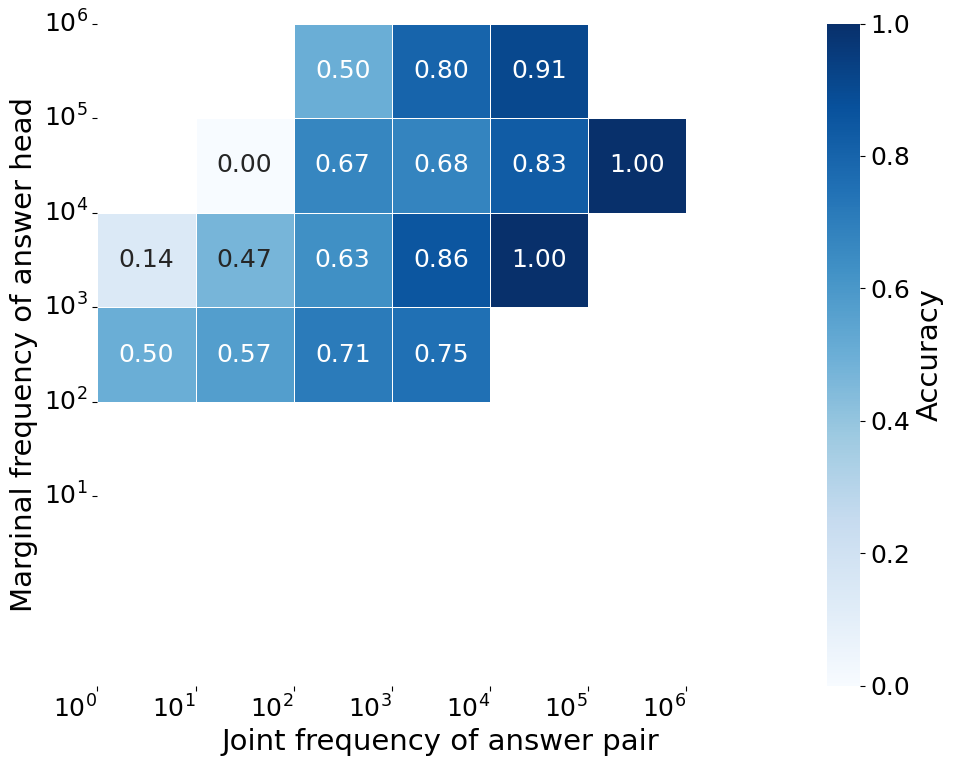

In [73]:
import seaborn as sns

model_name_dict = {
    # 'bert-base-uncased': 'BERT$_{base}$',
    # 'Meta-Llama-3-8B': 'Llama-3 8B',
    # 'gpt-3.5-turbo-0125': 'z'
    # 'gpt-4o-2024-08-06': 'z'
    'bert-large-uncased': 'z'
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

joint_freq_bins = [f'$10^{i}$' for i in range(6+1)]
subject_freq_bins = [f'$10^{i+1}$' for i in range(6)]

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = json.load(open(f'results/{model_name}_pred.json', 'r'))
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337
    # coo_matrix = bert_coo_matrix
    # num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_rank, results_acc, results_tail_rank, results_tail_acc = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

    for pred in tqdm(data):
        uid = pred['uid']
        if uid not in gt_filtered_uids:
            continue

        flag = True
        choices = pred['choice']
        subj_obj_counts = []
        subj_counts = []
        for c_idx, choice in enumerate(choices):
            subj, obj = choice
            subj = ' '.join(text_normalization_without_lemmatization(subj))
            obj = ' '.join(text_normalization_without_lemmatization(obj))

            subj_count = coo_matrix.count(subj)
            obj_count = coo_matrix.count(obj)
            subj_obj_count = coo_matrix.coo_count(subj, obj)
            
            if subj_obj_count < 0:
                flag = False
                break

            subj_obj_counts.append(subj_obj_count)
            subj_counts.append(subj_count)
        
        if not flag:
            continue

        ans_subj_obj_count = subj_obj_counts[pred['answer']]
        ans_subj_count = subj_counts[pred['answer']]

        subj_prob = ans_subj_count / num_total_samples
        joint_prob = ans_subj_obj_count / num_total_samples
        cond_prob = ans_subj_obj_count / ans_subj_count if ans_subj_count > 0 else 0

        joint_freq = ans_subj_obj_count
        joint_section = frequency_to_section(joint_freq)

        subj_freq = ans_subj_count
        subj_section = frequency_to_section(subj_freq)

        section = f'{joint_section}_{subj_section}'

        # results_rank[section].append(pred['rank'])
        results_acc[section].append(pred['accuracy'])
        # results_tail_rank[section].append(pred['tail_rank'])
        # results_tail_acc[section].append(pred['tail_accuracy'])

    num_samples = {}
    joint_sections = range(1, len(bins)+1)
    subj_sections = range(1, len(bins)+1)
    for joint_section in joint_sections:
        for subj_section in subj_sections:
            section = f'{joint_section}_{subj_section}'
            num_samples[section] = len(results_acc[section])

            if section in results_acc:
                # results_rank[section] = np.mean(results_rank[section]), np.std(results_rank[section])
                results_acc[section] = np.mean(results_acc[section]), np.std(results_acc[section])
                # results_tail_rank[section] = np.mean(results_tail_rank[section]), np.std(results_tail_rank[section])
                # results_tail_acc[section] = np.mean(results_tail_acc[section]), np.std(results_tail_acc[section])

    result = {}
    # for joint_section in joint_sections:
    #     for subj_section in subj_sections:
    #         section = f'{joint_section}_{subj_section}'
    #         if section in results_rank:
    #             result[f'result_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_rank[section]
    for joint_section in joint_sections:
        for subj_section in subj_sections:
            section = f'{joint_section}_{subj_section}'
            if section in results_acc:
                result[f'result_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_acc[section]
    # for joint_section in joint_sections:
    #     for subj_section in subj_sections:
    #         section = f'{joint_section}_{subj_section}'
    #         if section in results_tail_rank:
    #             result[f'result_tail_rank_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_rank[section]
    # for joint_section in joint_sections:
    #     for subj_section in subj_sections:
    #         section = f'{joint_section}_{subj_section}'
    #         if section in results_tail_acc:
    #             result[f'result_tail_accuracy_section_{frequency_section_to_string(section)}'] = f'%.2f +- %.2f' % results_tail_acc[section]

    # for joint_section in joint_sections:
    #     for subj_section in subj_sections:
    #         section = f'{joint_section}_{subj_section}'
    #         if section in results_hits_100:
    #             result[f'hits@100_remove_stopwords_section_{section}'] = f'%.2f +- %.2f' % results_hits_100[section]

    print(num_samples)

    hits_100_mean = [[results_acc[f'{joint_section}_{subj_section}'][0] for joint_section in joint_sections] for subj_section in subj_sections]
    hits_100_std = [[results_acc[f'{joint_section}_{subj_section}'][1] for joint_section in joint_sections] for subj_section in subj_sections]

    data = np.array(hits_100_mean)

    mask = np.ones_like(data.T, dtype='bool')
    mask[np.triu_indices_from(mask)] = False
    mask = np.rot90(mask, 1)

    data = np.flipud(data)

    ax = sns.heatmap(data, mask=mask, annot=True, fmt=".2f", linewidth=0.5, cmap='Blues',
                     cbar_kws={'label': 'Accuracy'})
    ax.set_facecolor("white")
    
# Rotate the tick labels for clarity
plt.xticks(range(len(joint_freq_bins)), joint_freq_bins, rotation=0, ha='right')
plt.yticks(range(len(subject_freq_bins)), subject_freq_bins[::-1], rotation=0)

# Set axis labels and title
plt.xlabel('Joint frequency of answer pair')
plt.ylabel('Marginal frequency of answer head')

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/{model_name}_{training_type}_accuracy_against_condprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()

In [ ]:
training_type = 'zeroshot'

In [ ]:
import seaborn as sns

model_name_dict = {
    'bert-base-uncased': 'BERT$_{base}$',
    # 'Meta-Llama-3-8B': 'Llama-3 8B',
}

# Scale factor for fonts
scale_factor = 1.5

# Update default font sizes
plt.rcParams.update({
    'font.size': 12 * scale_factor,
    'axes.labelsize': 14 * scale_factor,  # x and y labels from plt.xlabel and plt.ylabel
    'axes.titlesize': 16 * scale_factor,  # title from plt.title
    'xtick.labelsize': 12 * scale_factor,  # x tick labels
    'ytick.labelsize': 12 * scale_factor,  # y tick labels
    'legend.fontsize': 12 * scale_factor,  # legend font size
    'figure.titlesize': 18 * scale_factor  # suptitle
})

joint_freq_bins = [f'$10^{i}$' for i in range(6+1)]
subject_freq_bins = [f'$10^{i+1}$' for i in range(6)]

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

for model_name in model_name_dict.keys():
    print('='*30)
    print('='*30)
    print('Model:', model_name)

    try:
        data = jsonlines.open(f'../../../results/{dataset_name}/{model_name}_{dataset_name}_{training_type}/pred_{dataset_name}_{dataset_type}.jsonl')
    except:
        raise Exception
        # continue

    if 'gpt' in model_name or 'Llama' in model_name:
        coo_matrix = pile_coo_matrix
        num_total_samples = 254188957
    else:
        coo_matrix = bert_coo_matrix
        num_total_samples = 158887337

    openai_api = True if 'gpt-3.5-turbo' in model_name or 'gpt-4o' in model_name else False

    results_hits_1, results_hits_10, results_hits_100 = defaultdict(list), defaultdict(list), defaultdict(list)
    rel_results_hits_1, rel_results_hits_10, rel_results_hits_100 = defaultdict(dict), defaultdict(dict), defaultdict(dict)

    for pred in tqdm(data.iter()):
        subj = uid_subj_map[pred['uid']]
        rel = uid_rel_map[pred['uid']]
        obj = uid_obj_map[pred['uid']]
        subj = ' '.join(text_normalization_without_lemmatization(subj))
        obj = ' '.join(text_normalization_without_lemmatization(obj))
        
        subj_count = coo_matrix.count(subj)
        obj_count = coo_matrix.count(obj)
        subj_obj_count = coo_matrix.coo_count(subj, obj)

        # skip if the count is -1 (unknown)
        if subj_obj_count < 0:
            continue

        subj_prob = subj_count / num_total_samples
        joint_prob = subj_obj_count / num_total_samples
        cond_prob = subj_obj_count / subj_count if subj_count > 0 else 0

        joint_freq = subj_obj_count
        joint_section = frequency_to_section(joint_freq)

        subj_freq = subj_count
        subj_section = frequency_to_section(subj_freq)

        section = f'{joint_section}_{subj_section}'

        results_hits_1[section].append(pred['hits@1_remove_stopwords'])
        results_hits_10[section].append(pred['hits@10_remove_stopwords'])
        if not openai_api:
            results_hits_100[section].append(pred['hits@100_remove_stopwords'])

        # if section not in rel_results_hits_1[rel]:
        #     rel_results_hits_1[rel][section] = []
        #     rel_results_hits_10[rel][section] = []
        #     rel_results_hits_100[rel][section] = []
        # rel_results_hits_1[rel][section].append(pred['hits@1_remove_stopwords'])
        # rel_results_hits_10[rel][section].append(pred['hits@10_remove_stopwords'])
        # if not openai_api:
        #     rel_results_hits_100[rel][section].append(pred['hits@100_remove_stopwords'])

    num_samples = {}
    joint_sections = range(1, len(bins)+1)
    subj_sections = range(1, len(bins)+1)
    for joint_section in joint_sections:
        for subj_section in subj_sections:
            section = f'{joint_section}_{subj_section}'
            num_samples[section] = len(results_hits_1[section])

            if section in results_hits_1:
                results_hits_1[section] = np.mean(results_hits_1[section]), np.std(results_hits_1[section])
                results_hits_10[section] = np.mean(results_hits_10[section]), np.std(results_hits_10[section])
                results_hits_100[section] = np.mean(results_hits_100[section]), np.std(results_hits_100[section])

    result = {}
    for joint_section in joint_sections:
        for subj_section in subj_sections:
            section = f'{joint_section}_{subj_section}'
            if section in results_hits_1:
                result[f'hits@1_remove_stopwords_section_{section}'] = f'%.2f +- %.2f' % results_hits_1[section]

    for joint_section in joint_sections:
        for subj_section in subj_sections:
            section = f'{joint_section}_{subj_section}'
            if section in results_hits_100:
                result[f'hits@100_remove_stopwords_section_{section}'] = f'%.2f +- %.2f' % results_hits_100[section]

    print(num_samples)
    # print(json.dumps(result, indent=4))

    hits_100_mean = [[results_hits_100[f'{joint_section}_{subj_section}'][0] for joint_section in joint_sections] for subj_section in subj_sections]
    hits_100_std = [[results_hits_100[f'{joint_section}_{subj_section}'][1] for joint_section in joint_sections] for subj_section in subj_sections]

    data = np.array(hits_100_mean)

    mask = np.ones_like(data.T, dtype='bool')
    mask[np.triu_indices_from(mask)] = False
    mask = np.rot90(mask, 1)

    data = np.flipud(data)

    ax = sns.heatmap(data, mask=mask, annot=True, fmt=".2f", linewidth=0.5, cmap='Blues',
                     cbar_kws={'label': 'Hits@100'})
    ax.set_facecolor("white")
    
# Rotate the tick labels for clarity
plt.xticks(range(len(joint_freq_bins)), joint_freq_bins, rotation=0, ha='right')
plt.yticks(range(len(subject_freq_bins)), subject_freq_bins[::-1], rotation=0)

# Set axis labels and title
plt.xlabel('Joint frequency of subject and object')
plt.ylabel('Subject frequency')

# Show the plot
# plt.title('Model Performance Comparison')
filename = f'results/{dataset_name}_{dataset_type}_{model_name}_{training_type}_hits@100_against_condprob.pdf'
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig(filename, format='pdf')
plt.show()